## <font color='green'>Section 1: Business understanding</font>
- <font color='darkorange'>Question 1 - What is the distribution of Years Coding Experience versus the Number of Developers?</font>
- <font color='darkorange'>Question 2 - Which Programming Language do the Developers work for the past years?</font>
- <font color='darkorange'>Question 3 - Which Database Environments do the Developers work for the past years?</font>

#### Import libraries
If there are any libraries below that you haven't yet installed, just use `!pip install` to install the necessary libraries

In [1]:
import io
import zipfile
import requests
import os
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the csv file


In [2]:
url =  'https://cdn.stackoverflow.co/files/jo7n4k8s/production/49915bfd46d0902c3564fd9a06b509d08a20488c.zip/stack-overflow-developer-survey-2023.zip'
path="./" + url.split("/")[-1].split(".")[0]

# Use the requests library to make the connection to the url
r = requests.get(url)

# Extract the contents from the downloaded zipfile
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall(path=path)

## <font color='green'>Section 2: Data Understanding</font>

#### Read in the files

In [3]:
working_dir = os.getcwd()

public_file = [] # The path location for the survey data will be stored in this list

for root, dirs, files in os.walk(working_dir):
    files = glob.glob(os.path.join(root, '*public.csv'))
    for f in files:
        public_file.append(f)

schema_file = [] # The path location for the schema data will be stored in this list

for root, dirs, files in os.walk(working_dir):
    files = glob.glob(os.path.join(root, '*schema.csv'))
    for f in files:
        schema_file.append(f)

In [4]:
pd.options.display.max_colwidth = None # Changing default dataframe column width so we can see the entire Question column

In [5]:
schema = pd.read_csv(schema_file[0])# Read in the schema data
schema.tail(10)

,qid,qname,question,force_resp,type,selector
68,QID289,Knowledge_2,"Knowledge silos prevent me from getting ideas across the organization (i.e., one individual or team has information that isn't shared with others)",NaN,MC,MAVR
69,QID289,Knowledge_3,I can find up-to-date information within my organization to help me do my job.,NaN,MC,MAVR
70,QID289,Knowledge_4,I am able to quickly find answers to my questions with existing tools and resources.,NaN,MC,MAVR
71,QID289,Knowledge_5,I know which system or resource to use to find information and answers to questions I have.,NaN,MC,MAVR
72,QID289,Knowledge_6,I often find myself answering questions that I’ve already answered before.,NaN,MC,MAVR
73,QID289,Knowledge_7,Waiting on answers to questions often causes interruptions and disrupts my workflow.,NaN,MC,MAVR
74,QID289,Knowledge_8,I feel like I have the tools and/or resources to quickly understand and work on any area of my company's code/system/platform.,NaN,MC,MAVR
75,QID290,Frequency_1,Needing help from people outside of your immediate team?,NaN,MC,MAVR
76,QID290,Frequency_2,Interacting with people outside of your immediate team?,NaN,MC,MAVR
77,QID290,Frequency_3,Encountering knowledge silos (where one individual or team has information that's not shared or distributed with other individuals or teams) at work?,NaN,MC,MAVR


In [6]:
pd.options.display.max_columns = None # Changing the default dataframe columns shown so that we can see al of them

In [7]:
survey = pd.read_csv(public_file[0]) # Read in the survey data
survey.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Bootstrapping a business;Professional development or self-paced learning from online courses,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Colleague;Friend or family member;Hackathons (virtual or in-person);Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Recorded coding sessions;How-to videos;Video-based Online Courses;Written-based Online Courses;Auditory material (e.g., podcasts);Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Stack Overflow",Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work with;Visit developer communities like Stack Overflow;Other (please specify):,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScript;HTML/CSS;JavaScript;Rust,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Webpack;Yarn,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for Linux (WSL),MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;Notion;Trello,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google Meet;Signal;Skype;Slack;Telegram;Whatsapp;Zoom,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I think improving search and clarifying poorly worded questions would be useful (especially for moderators/editors).",Yes,Indif

## <font color='green'>Section 3: Data Preparation</font>

#### Check for missing values in the columns of interest in the schema dataframe

In [8]:
schema.isnull().sum()

qid            0
qname          0
question       0
force_resp    11
type           0
selector       0
dtype: int64

#### Dropping the rows with missing values in the 'force_resp' columns

In [9]:
schema = schema.dropna(subset=['force_resp']).reset_index(drop=True)

In [10]:
schema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   qid         67 non-null     object
 1   qname       67 non-null     object
 2   question    67 non-null     object
 3   force_resp  67 non-null     object
 4   type        67 non-null     object
 5   selector    67 non-null     object
dtypes: object(6)
memory usage: 3.3+ KB


In [11]:
schema.shape

(67, 6)

We can confirm that there are no missing values in the schema dataframe

#### Check for missing values in the columns of interest in the survey dataframe

Below are the columns of interest

In [12]:
columns_of_interest = ['Age', 'YearsCode', 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith']

In [13]:
# Checking for any missing values in the columns of interest
survey[columns_of_interest].isnull().sum()

Age                           0
YearsCode                  1749
LanguageHaveWorkedWith     2044
DatabaseHaveWorkedWith    15749
dtype: int64

Almost 2% of the 'LanguageHaveWorkedWith' and 17% of 'DatabaseHaveWorkedWith' values are missing. We will drop the missing values as we need this value to determine which types of companies pay the most to answer Question 2 and Question 3.

In [14]:
survey.LanguageHaveWorkedWith.isnull().sum() / survey.shape[0] * 100

2.2918909221385

In [15]:
survey.DatabaseHaveWorkedWith.isnull().sum() / survey.shape[0] * 100

17.65899712952996

#### Dropping the rows with missing values in the LanguageHaveWorkedWith and DatabaseHaveWorkedWith columns

In [16]:
survey = survey.dropna(subset=['LanguageHaveWorkedWith','DatabaseHaveWorkedWith']).reset_index(drop=True)

In [17]:
# Check to see if it worked
survey[columns_of_interest].isnull().sum()

Age                         0
YearsCode                 329
LanguageHaveWorkedWith      0
DatabaseHaveWorkedWith      0
dtype: int64

#### For the remaining missing values
- we will fill the YearsCode missing values with the mode

In [18]:
# Imputing the YearsCode missing values with the mode
survey.YearsCode.fillna(survey.YearsCode.mode()[0], inplace=True)

In [19]:
# Check if we have successfully removed the missing values from the columns of interest
survey[columns_of_interest].isnull().sum()

Age                       0
YearsCode                 0
LanguageHaveWorkedWith    0
DatabaseHaveWorkedWith    0
dtype: int64

## <font color='green'>Section 4: Evalute Results</font>

#### <font color='darkorange'>Question 1 - What is the distribution of Years Coding Experience versus the Number of Developers?</font>

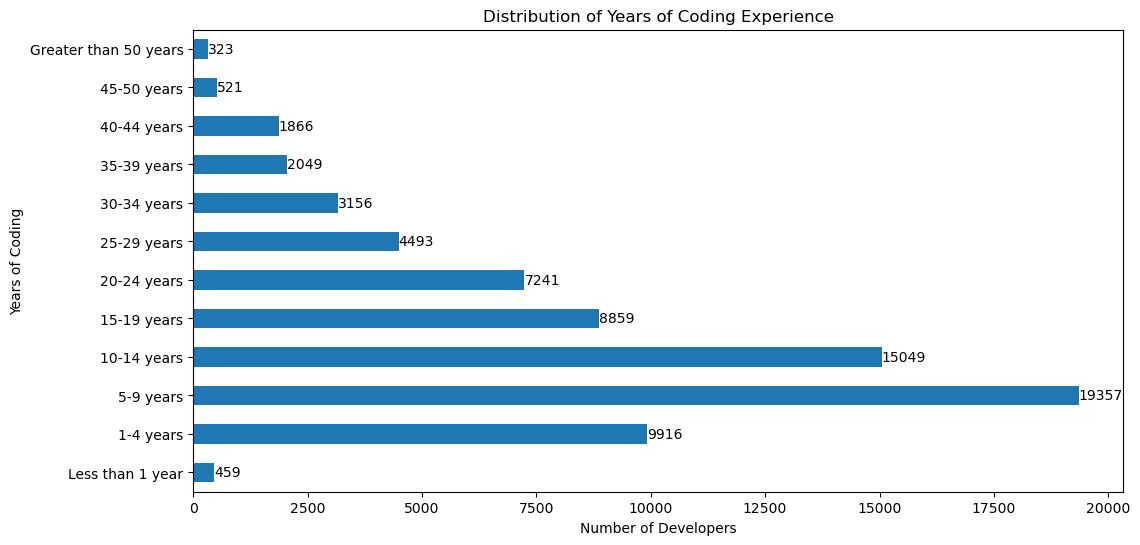

In [20]:
survey['YearsCode'] = survey['YearsCode'].replace({"Less than 1 year": 0.5, "More than 50 years": 52})

survey.loc[:, 'YearsCode'] = pd.to_numeric(survey['YearsCode'], errors='coerce')

# Create age groups
bins = [0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, float('inf')]
labels = ['Less than 1 year', '1-4 years', '5-9 years', '10-14 years', '15-19 years', '20-24 years', '25-29 years', '30-34 years', '35-39 years', '40-44 years', '45-50 years', 'Greater than 50 years']

# Group by 'AgeGroup' and sum the counts for each group
grouped_data = survey.loc[:, 'AgeGroup'] = pd.cut(survey['YearsCode'], bins=bins, labels=labels, right=False).value_counts().reindex(labels, fill_value=0)

# Plot the results with annotations
plt.figure(figsize=(12, 6))
ax = grouped_data.plot.barh()

# Annotate each bar with the number of responses
for index, value in enumerate(grouped_data):
    ax.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.xlabel('Number of Developers')
plt.ylabel('Years of Coding')
plt.title('Distribution of Years of Coding Experience')
plt.show()

*We can see the Number of Developers increase from 'Less than 1 year' to '5-9 years' and then decrease until 'Greater than 50 years' in the survey.*

**Key points:**
- 48% of Developers have been coding for less than ten years.
- 5-9 Years of Coding has the largest Developers with 19,357 Developers.
- 'Greater than 50 year' has the least number of Developers with only 323 Developers.

<font color='darkorange'>Question 2 - Which Programming Language do the Developers work for the past years?</font>

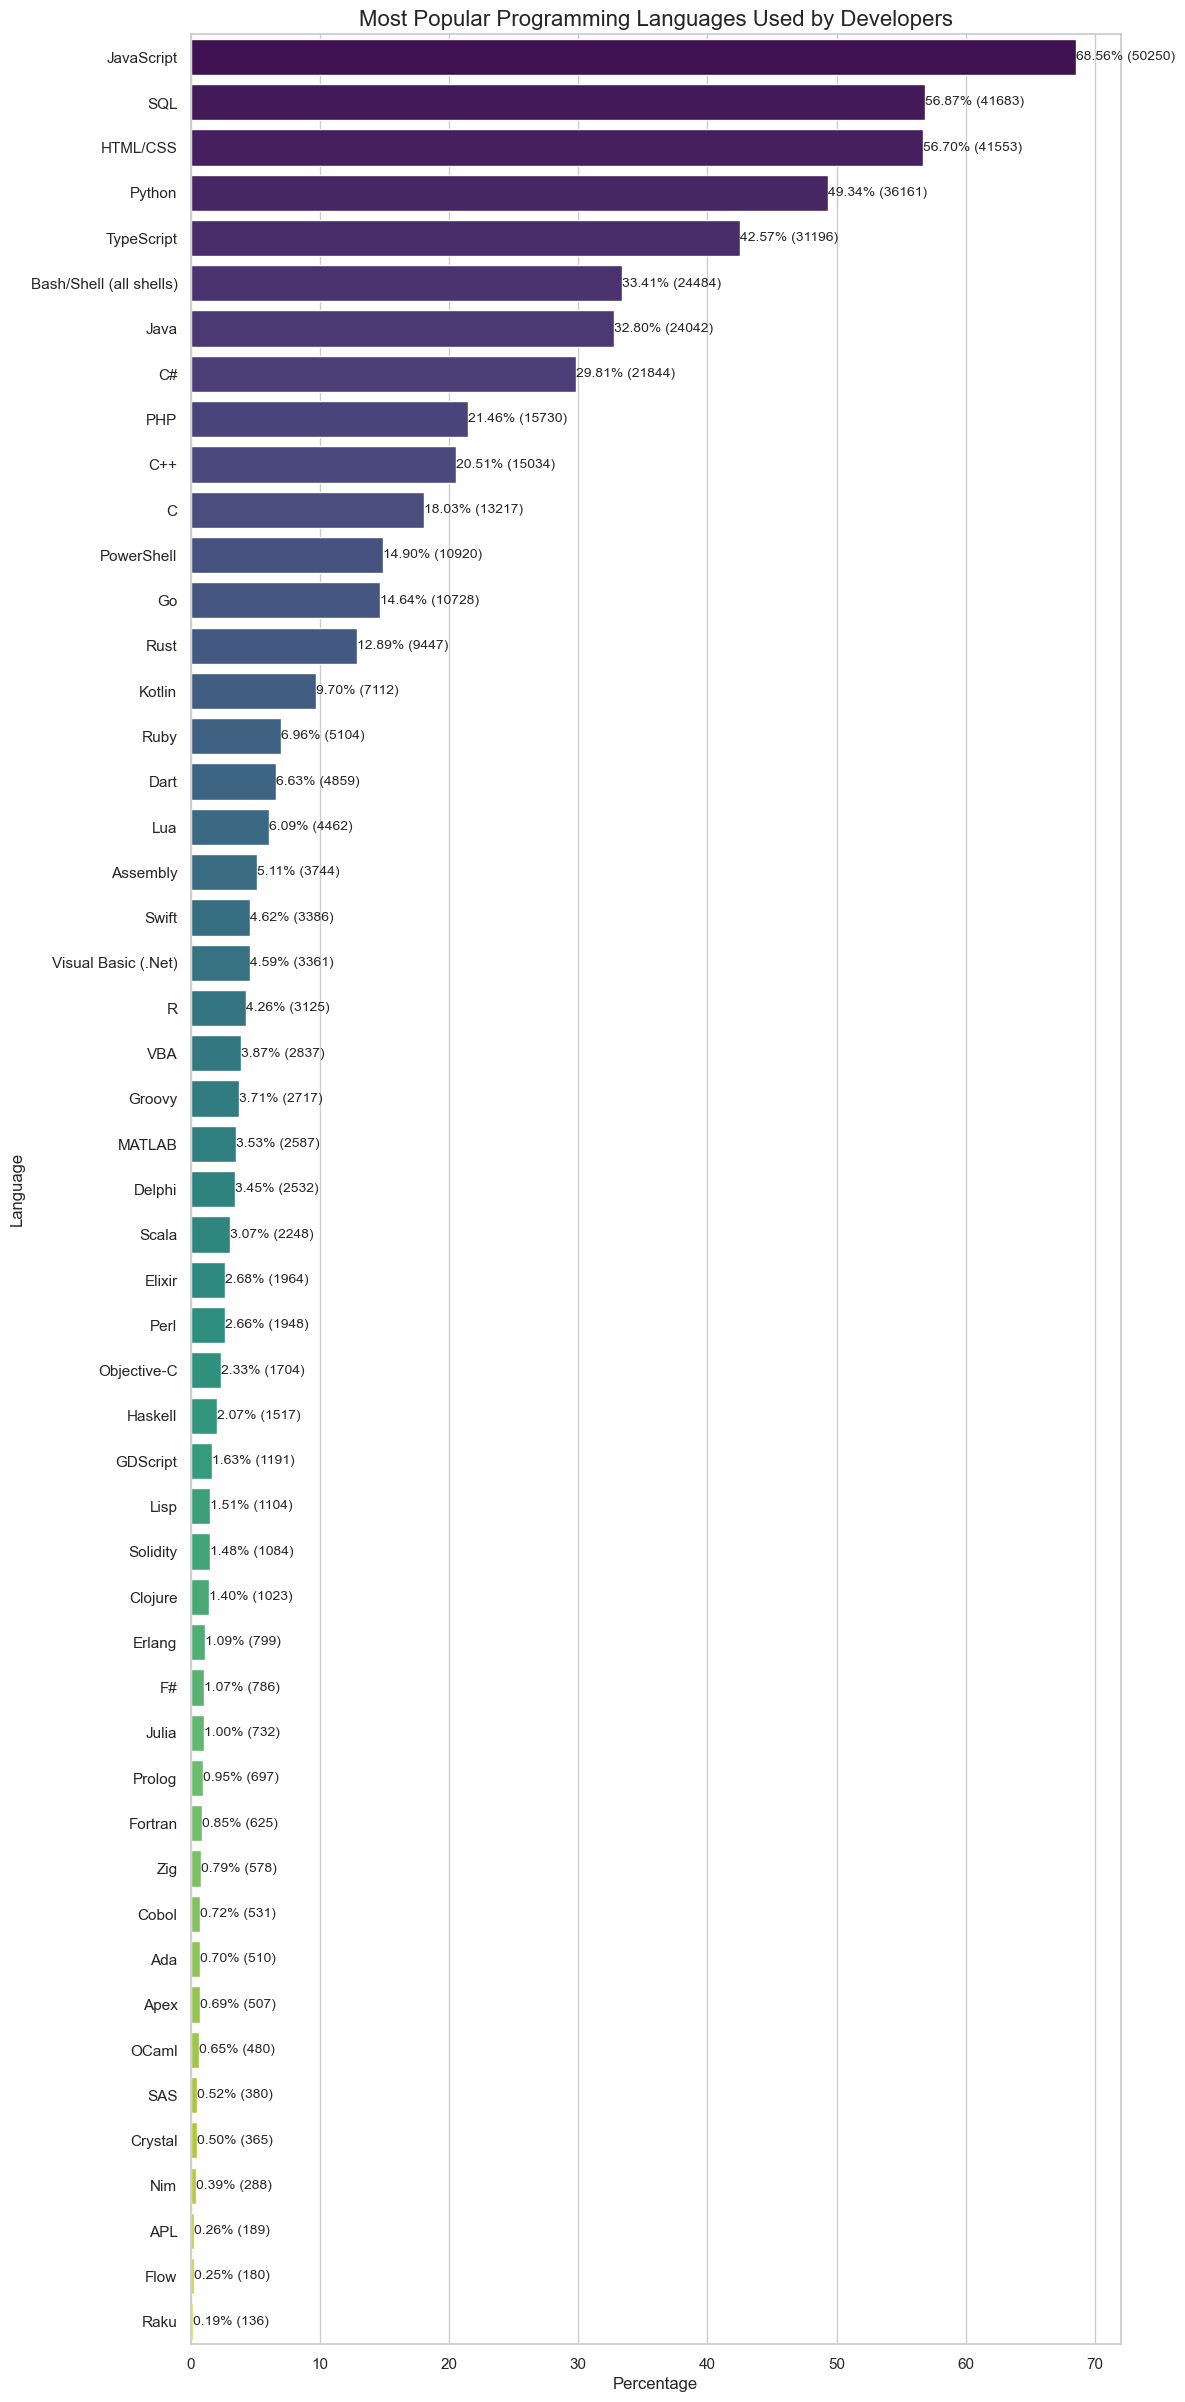

In [21]:
languages_list = survey['LanguageHaveWorkedWith'].str.split(';')

# Flatten the list of lists into a single list
all_languages = [lang for sublist in languages_list.dropna() for lang in sublist]

# Create a DataFrame with the counts of each language
language_counts = pd.Series(all_languages).value_counts().reset_index()
language_counts.columns = ['Language', 'Count']

# Calculate the percentage of responses for each language
language_counts['Percentage'] = (language_counts['Count'] / len(languages_list.dropna())) * 100

# Sort the DataFrame by percentage
language_counts = language_counts.sort_values(by='Percentage', ascending=False)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the results
plt.figure(figsize=(12, 30))
ax = sns.barplot(x='Percentage', y='Language', data=language_counts,palette='viridis')

# Display the percentage values at the end of each bar
for index, (percentage, count) in enumerate(zip(language_counts['Percentage'], language_counts['Count'])):
    ax.text(percentage, index, f'{percentage:.2f}% ({count})', ha='left', va='center', fontsize=10)

# Set plot title
plt.title('Most Popular Programming Languages Used by Developers', fontsize=16)

# Show the plot
plt.show();


*Top 5 Programming Language use by the Developers are JavaScript, SQL, HTML/CSS, Python and TypeScript.*

**Key points:**
- JavaScript has the highest popular Programming Language Used by Developers with 50,250 at 68.56%.
- SQL and HTML/CSS ranked 2 and 3 respectively with 41,683 and 41,553 Developers (56.87% and 56.70%).

#### <font color='darkorange'>Question 3 - Which Database Environments do the Developers work for the past years?</font>

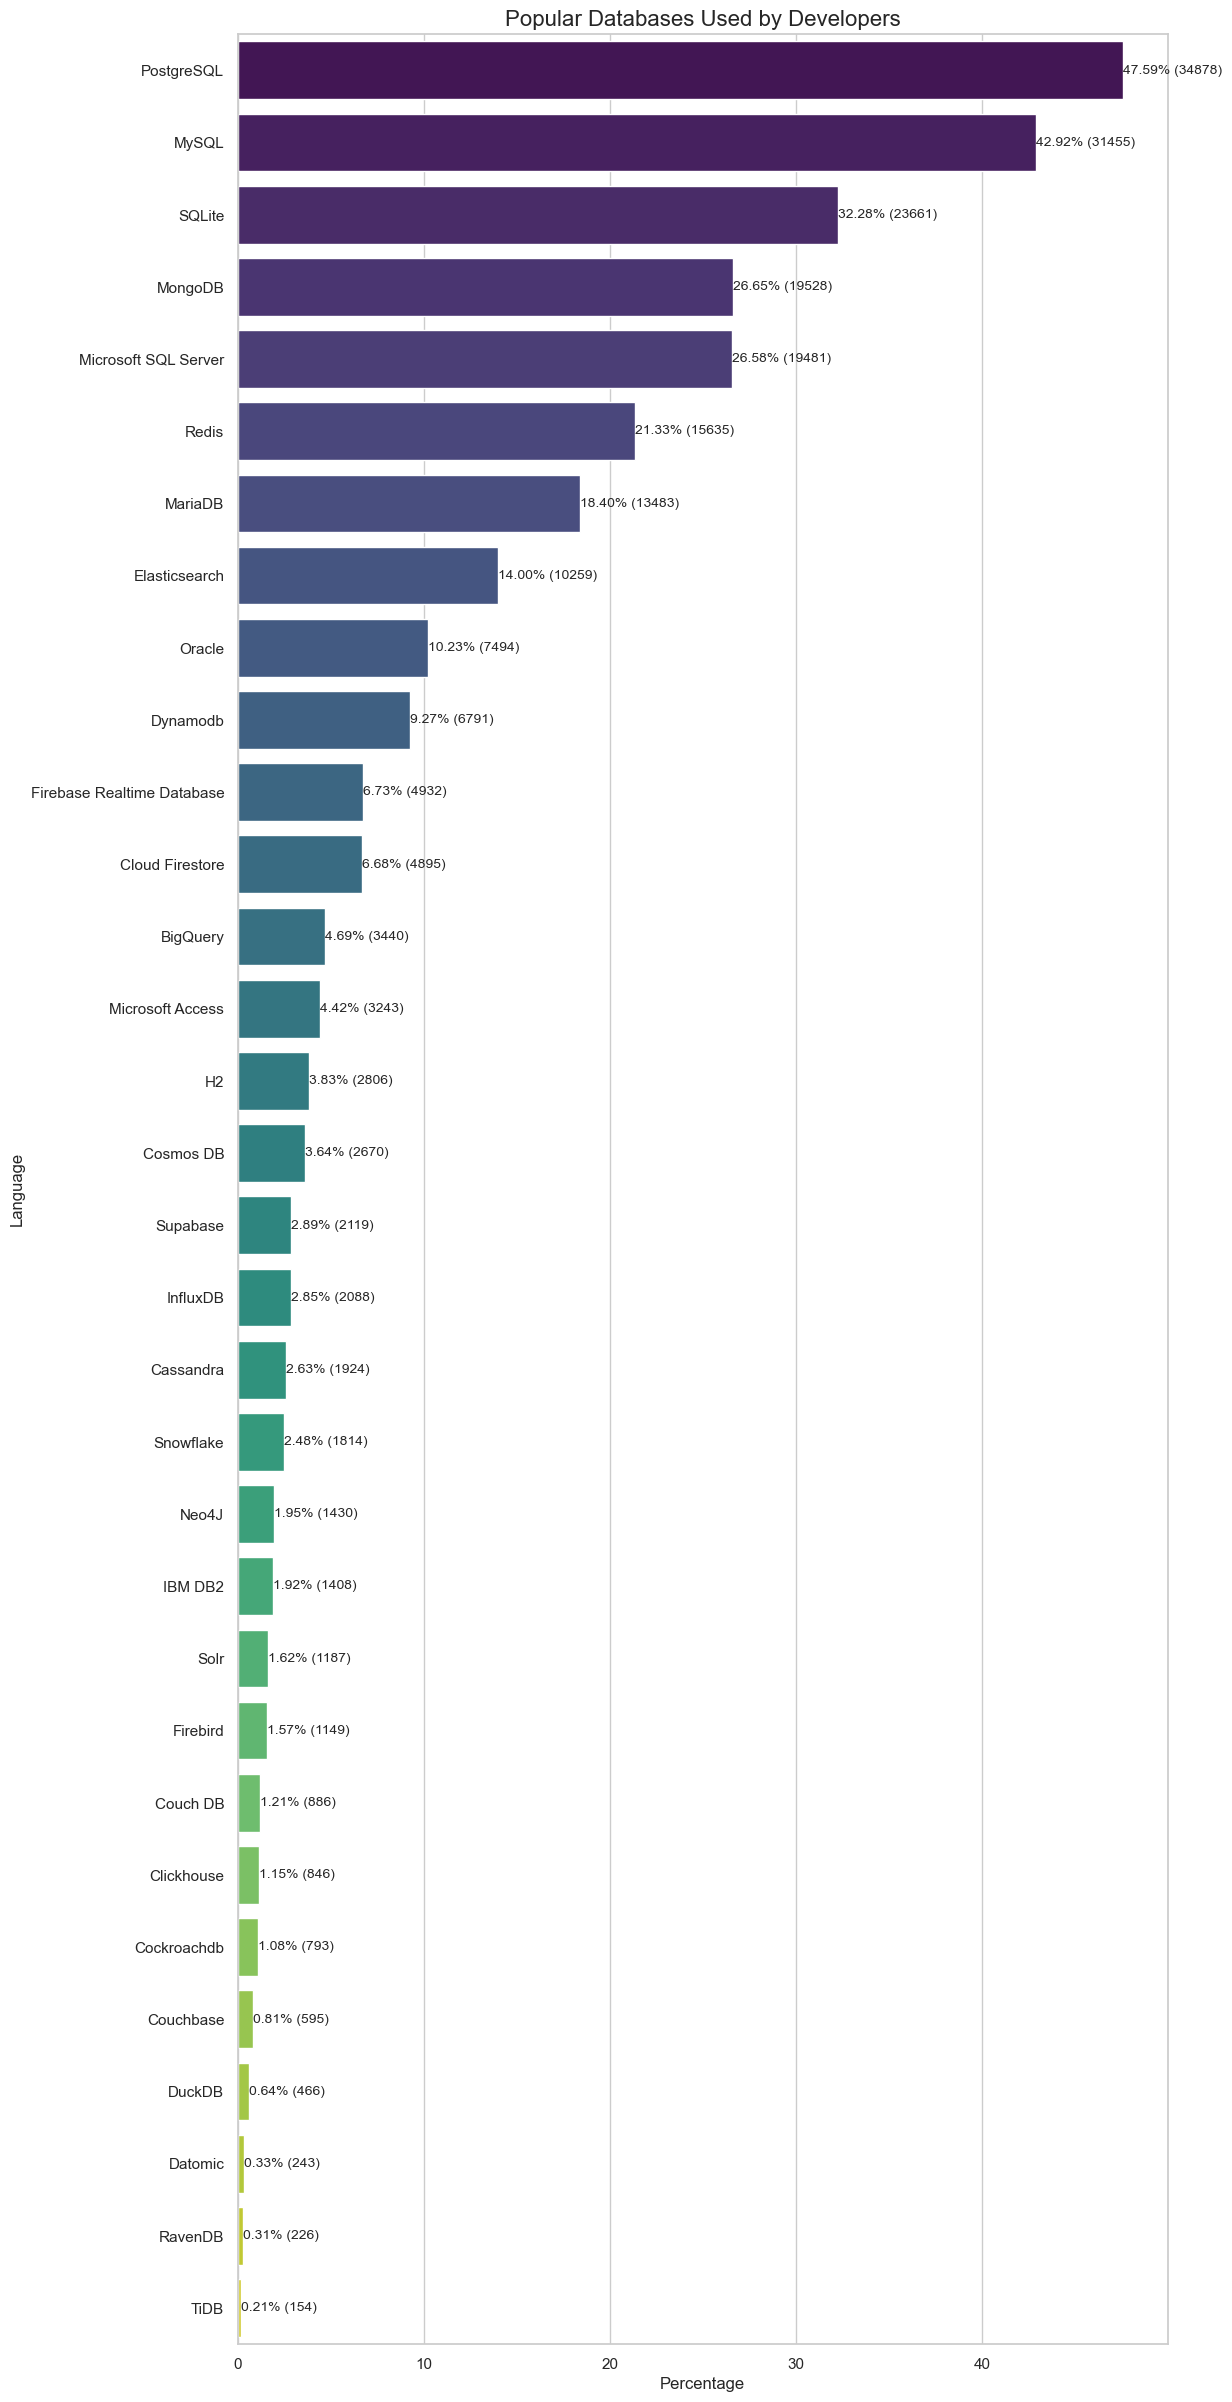

In [22]:
languages_list = survey['DatabaseHaveWorkedWith'].str.split(';')

# Flatten the list of lists into a single list
all_languages = [lang for sublist in languages_list.dropna() for lang in sublist]

# Create a DataFrame with the counts of each language
language_counts = pd.Series(all_languages).value_counts().reset_index()
language_counts.columns = ['Language', 'Count']

# Calculate the percentage of responses for each language
language_counts['Percentage'] = (language_counts['Count'] / len(languages_list.dropna())) * 100

# Sort the DataFrame by percentage
language_counts = language_counts.sort_values(by='Percentage', ascending=False)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the results
plt.figure(figsize=(12, 30))
ax = sns.barplot(x='Percentage', y='Language', data=language_counts, palette='viridis')

# Display the percentage values at the end of each bar
for index, (percentage, count) in enumerate(zip(language_counts['Percentage'], language_counts['Count'])):
    ax.text(percentage, index, f'{percentage:.2f}% ({count})', ha='left', va='center', fontsize=10)

# Set plot title
plt.title('Popular Databases Used by Developers', fontsize=16)

# Show the plot
plt.show();


*Top 5 Database Environment use by the Developers are PostgreSQL, MySQL, SQLite, MongoDB and Microsoft SQL Server.*

**Key points:**
- PostgreSQL has the highest popular Database Environment Used by Developers with 34,878 at 47.59%.
- MySQL and SQLite ranked 2 and 3 respectively with 31,455 and 23,661 Developers (42.92% and 32.28%).